In [487]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import functions_gradient_circles as fgc
import movies_from_plots as mfp
import functions_linear_models as flm

In [488]:
import importlib

In [819]:
importlib.reload(fgc)

<module 'functions_gradient_circles' from 'C:\\Users\\Rafael\\Documents\\Downloads\\functions_gradient_circles.py'>

# Example using mathematically defined parametric curve

In [ ]:
a = 2
b = 1

t = 2*np.pi*np.arange(0,101)/100

x = a*np.cos(t)#(a-b)*np.cos(2*t) + b*np.cos(2*t*(a/b-1))
y = b*np.sin(t)#(a-b)*np.sin(2*t) - b*np.sin(2*t*(a/b-1))

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(x,y)

# Using a given parametric curve

In [ ]:
f1 = np.load('parametriccurve.npy')
f2 = (f1/np.max(f1,0)-0.5)
f0 = f2 - np.mean(f2,0)

In [ ]:
f = np.zeros(f0.shape)
for i in range(2):
    sigma = int(np.sqrt(len(f1)/2))
    f[sigma*3:-3*sigma+1,i] = np.convolve(f0[:,i],flm.gauss_kernel95(sigma),'valid')
    int_s = len(f)//2-(sigma*3)//2
    int_e = len(f)//2+(sigma*3)//2
    f[:sigma*3+1,i] = np.fft.ifftshift(np.convolve(np.fft.fftshift(f0[:,i]),flm.gauss_kernel95(sigma),'valid'))[:sigma*3+1]
    f[-sigma*3:,i] = np.fft.ifftshift(np.convolve(np.fft.fftshift(f0[:,i]),flm.gauss_kernel95(sigma),'valid'))[-sigma*3:]
    

## Smoothing

In [ ]:
x = (f[:,1]-np.median(f[:,1]))/np.max(f[:,1])
y = (f[:,0]-np.median(f[:,0]))/np.max(f[:,0])
t = np.arange(0,len(x))/len(x)
#x = sig.savgol_filter(x_n,15,5)
#y = -sig.savgol_filter(y_n,15,5)

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(x,y)

# Length of generated curve

In [8]:
dt = (t[1]-t[0])
def Length(x,y,dt):
    dx = np.diff(x)/dt
    dy = np.diff(y)/dt
    s = (dx**2+dy**2)**0.5
    return np.sum(s*dt)

L = Length(x,y,dt)

# Making a circle with same length

In [19]:
r = L/(2*np.pi)
T = np.sum(t)
ff = 1.0

Cx = r*np.cos(2*np.pi*t)
Cy = r*np.sin(2*np.pi*t)

In [430]:
R_gamma = np.sqrt(x**2+y**2)

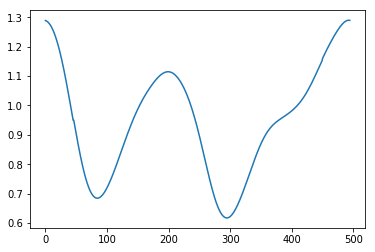

In [433]:
plt.plot(R_gamma)

In [10]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [11]:
plt.plot(y)
plt.plot(x)

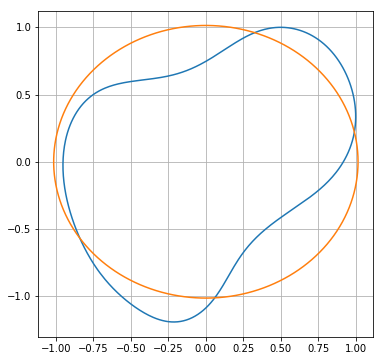

In [14]:
plt.figure(figsize=(6,6))
plt.plot(x-x_mean,y-y_mean)
#plt.plot(x_mean,y_mean,'*')
plt.plot(Cx,Cy)
plt.grid()

# Linear homotopy

In [811]:
N = 500
H = np.zeros((2,len(y),N))
for i in range(N):
    t_ = 1-np.exp(-i/N)
    H[:,:,i] = np.array([Cx*t_+x*(1-t_),Cy*t_+y*(1-t_)])

In [812]:
R = H[0]**2+H[1]**2
dR = np.diff(R.T)/dt

In [813]:
L_h = np.zeros(N)
for i in range(N):
    L_h[i] = Length(H[0,:,i],H[1,:,i],dt)

In [814]:
h_array = np.zeros((N,2,len(y)))
h_array[:,0] = H[0].T
h_array[:,1] = H[1].T

Text(0.5, 1.0, 'Linear homotopy')

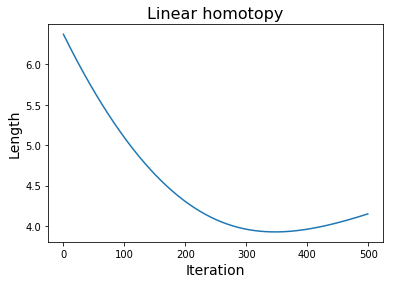

In [815]:
plt.plot(L_h)
plt.xlabel('Iteration',fontsize = 14)
plt.ylabel('Length',fontsize = 14)
plt.title('Linear homotopy', fontsize = 16)

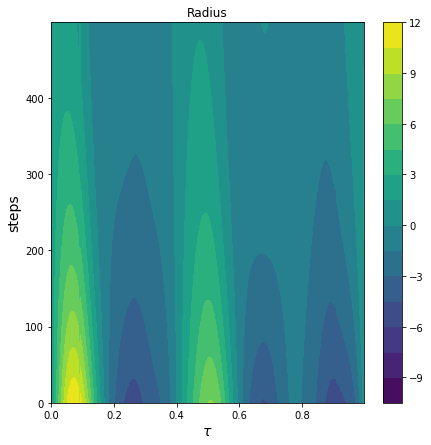

In [820]:
plt.figure(figsize=(7,7))
plt.contourf(t[:-1],np.arange(500),(-(dR)),20)
plt.xlabel('$\\tau$',fontsize=14)
plt.ylabel('steps',fontsize=14)
plt.title('Radius')
plt.colorbar()

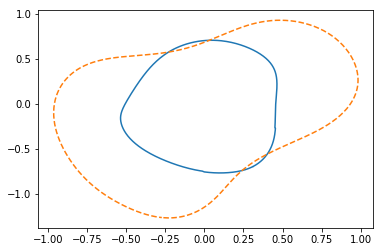

In [817]:
j = 300
plt.plot(H[0,:,j],H[1,:,j])
plt.plot(H[0,:,0],H[1,:,0],'--')
plt.show()

# Gradient descent

In [900]:
N = 1000 #max number of iterations
mu = 10**(1) #learning rate
prec_r = 0.0001 #precision

g = np.array([x-x_mean,y-y_mean])
C = np.array([Cy,Cx])

g_1 = np.zeros(g.shape)
g_0 = g_1


#new versions

g, g_list,c_list,L_g = fgc.Grad_D_Dif_Eq_rad(g,dt,N,prec_r,mu)

Total number of steps: 549
Maximum curvature difference: 9.936571363240441e-05
Ratio of total length: 1.0020308429640101


In [909]:
(648-638)/648

0.015432098765432098

In [901]:
dk_array = np.array(c_list)
g_array = np.array(g_list)

Text(0.5, 1.0, 'Gradient descent homotopy')

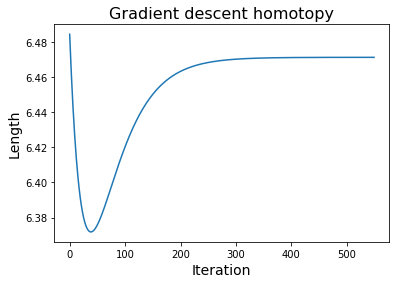

In [902]:
plt.plot(L_g)
plt.xlabel('Iteration',fontsize = 14)
plt.ylabel('Length',fontsize = 14)
plt.title('Gradient descent homotopy', fontsize = 16)

In [903]:
g_array.shape

(550, 2, 495)

In [904]:
dk_array.shape

(549, 495)

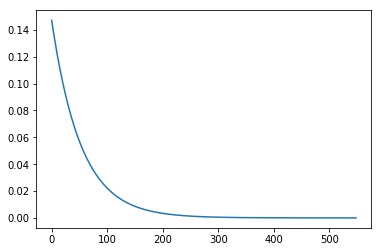

In [905]:
plt.plot(np.mean(np.abs(dk_array),1))

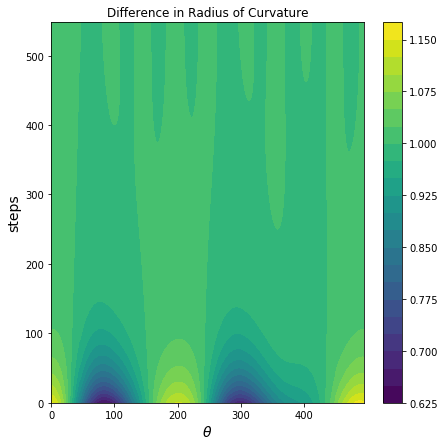

In [906]:
plt.figure(figsize=(7,7))
plt.contourf((((dk_array))+1),20)
plt.xlabel('$\\theta$',fontsize=14)
plt.ylabel('steps',fontsize=14)
plt.title('Difference in Radius of Curvature')
plt.colorbar()

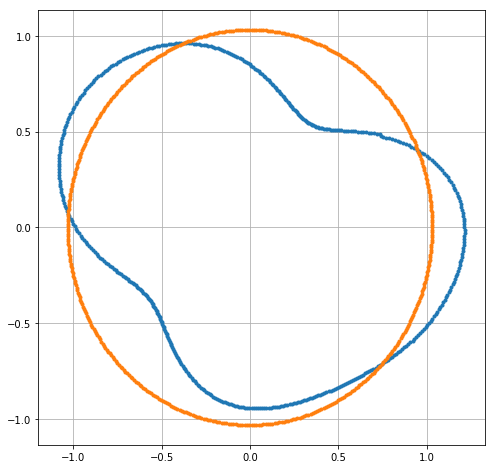

In [907]:
plt.figure(figsize=(8,8))
g = np.array([x,y])
plt.plot(g_array[0,0],g_array[0,1],'.')
plt.plot(g_array[-1,0],g_array[-1,1],'.')
#plt.plot(1.25*g_list[-1][0],1.25*g_list[-1][1],'.')
#plt.plot(Cx,Cy,'k')
#plt.xlim(-2,2)
plt.grid()

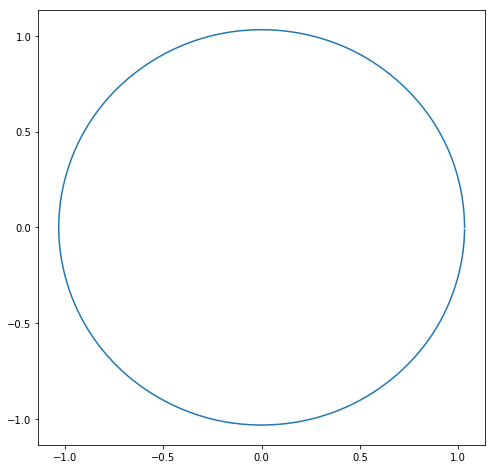

In [908]:
plt.figure(figsize=(8,8))

plt.plot(g_array[-1,0],g_array[-1,1],'-')
#plt.xlim(-2,2)
#plt.ylim(-2,2)

Text(0.5, 1.0, 'A')

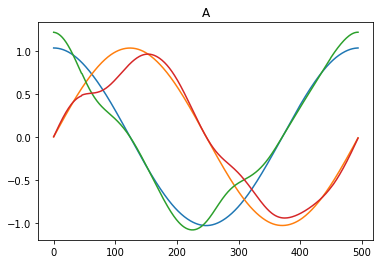

In [890]:
plt.plot(g_array[-1,:].T)
plt.plot(g_array[0,:].T)
plt.title('A')

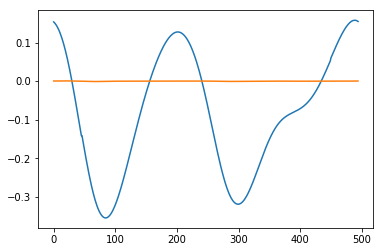

In [891]:
plt.plot((dk_array.T)[:,0])
j = -1
plt.plot((dk_array.T)[:,j])
#plt.plot((dk_array.T)[:,0]-(dk_array.T)[:,-1])
#plt.plot(L/(2*np.pi),'.')


# Movie making

In [633]:
file_path = 'C:\\Users\\Rafael\\Documents\\Downloads\\'

In [707]:
N_initial = 0
N_final = 400
frame_step = 4
dt = (t[1]-t[0])

mfp.makemovie(g_array,dt)

Starting frame: 0
Stopping frame: 10000
Frame step: 100
Image File Path: C:\\Users\\Rafael\\Documents\\Downloads\\
Video file name (with .mp4 included): constrainanddiffusion.mp4


# Testing for 1D curve

In [398]:
test_func = np.sin(np.pi*(t+dt))

In [399]:
def same_size_diff(f):
    diff_f = np.zeros(np.size(f))
    diff_f[:-1] = np.diff(f)
    diff_f[-1] = -(f[-2]-f[-1])
    return diff_f

def same_size_diff2(f):
    diff_f = np.zeros(np.size(f))
    diff_f[:-2] = np.diff(np.diff(f))
    diff_f[-2] = 0.5*(f[-4]+f[-2]-2*f[-3])
    diff_f[-1] = 0.5*(f[-3]+f[-1]-2*f[-2])
    return diff_f

def length1dpolar(f,dt):
    df = same_size_diff(f)/dt
    s = np.sqrt(f**2+df**2)
    return np.sum(s*dt)
    

In [400]:
1/dt**2

245025.0

In [455]:
N = 500
sigma = 0.01
test_array = np.zeros((len(t),N))
test_array[:,0] = test_func
r_w=length1dpolar(test_func,dt)
for i in range(N-1):
    
    #dtf_i =same_size_diff2(test_array[:,i])
    dtf_i =same_size_diff2(test_array[:,i])+(test_array[:,i]-r_w)
    #dtf_i =same_size_diff2(test_array[:,i])+(test_array[:,i]**2-r_w**2)
    test_array[:,i+1] = test_array[:,i] - sigma*dtf_i
    

dtf = same_size_diff(test_func)

In [456]:
j = 70
#plt.plot(t,test_func,'.')
#plt.plot(t,same_size_diff(same_size_diff(test_func)/dt),'.')
#plt.plot(t[0:50],test_array[0:50,0])
#plt.plot(t[0:50],test_array[0:50,j])

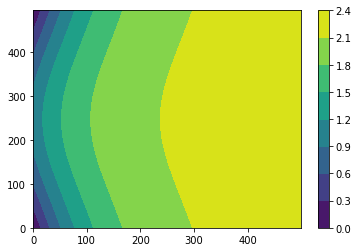

In [457]:
plt.contourf(test_array[:,:])
plt.colorbar()

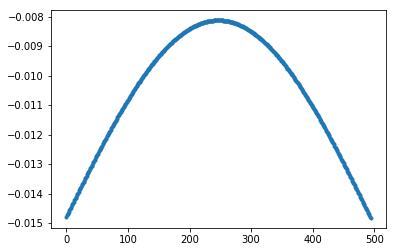

In [458]:
plt.plot((dtf_i[:]),'.')
#plt.xlim(450,500)

In [459]:
l_vec= []
for i in range(N):
    l_vec.append(length1dpolar(test_array[:,i],dt))

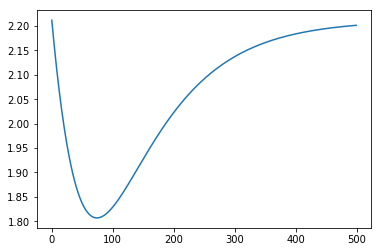

In [460]:
plt.plot(l_vec)